In [6]:
# Importing libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# 1 Exercise: Basic Concepts

## Task 1.1 Basic calculation and plotting

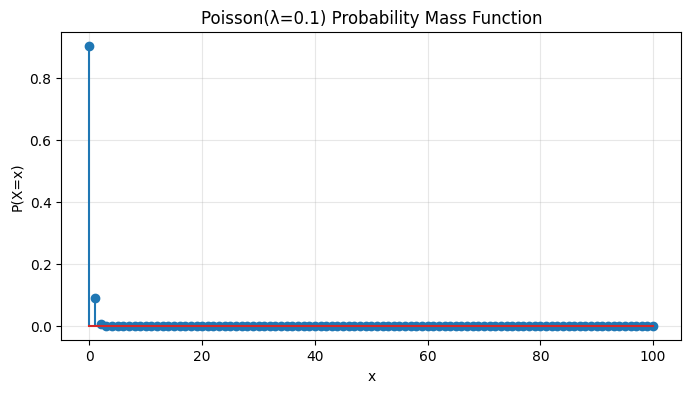

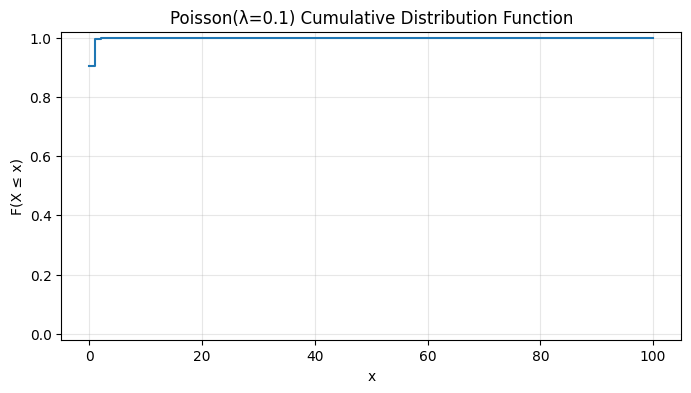

In [3]:
# Parameter
lam = 0.1

# Values from 0 to 100
x = np.arange(0, 101)

# Compute probabilities
pmf = [math.exp(-lam) * (lam**k) / math.factorial(k) for k in x]

# PMF plot
plt.figure(figsize=(8,4))
plt.stem(x, pmf)
plt.title("Poisson(λ=0.1) Probability Mass Function")
plt.xlabel("x")
plt.ylabel("P(X=x)")
plt.grid(alpha=0.3)
plt.show()

# Compute CDF
cdf = np.cumsum(pmf)

# CDF plot
plt.figure(figsize=(8,4))
plt.step(x, cdf, where="post")
plt.title("Poisson(λ=0.1) Cumulative Distribution Function")
plt.xlabel("x")
plt.ylabel("F(X ≤ x)")
plt.ylim(-0.02, 1.02)
plt.grid(alpha=0.3)
plt.show()

task b: <i>Consider a continuous random variable Y that has an exponential distribution with parameter µ(> 0). (i)
Let µ = 1. Plot the probability density function fX(x) and the cumulative distribution function FX(x).
(ii) Now suppose µ = 10. Plot the probability density function fX(x) and the cumulative distribution
function FX(x)</i>

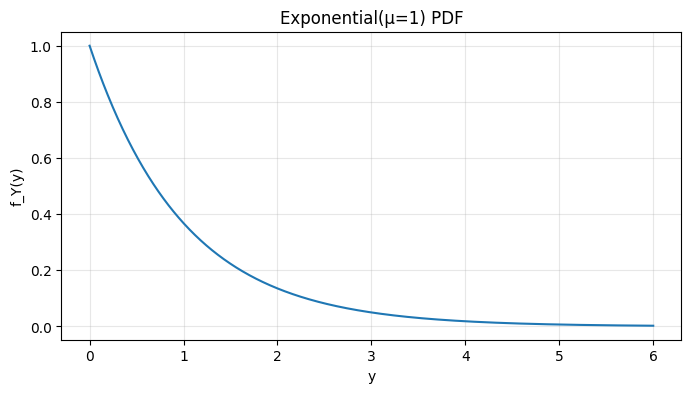

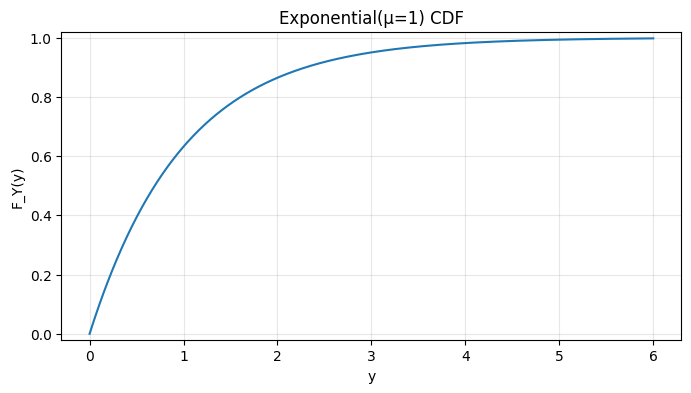

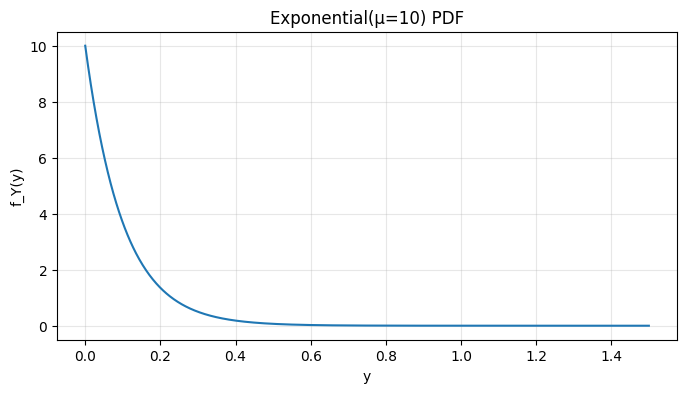

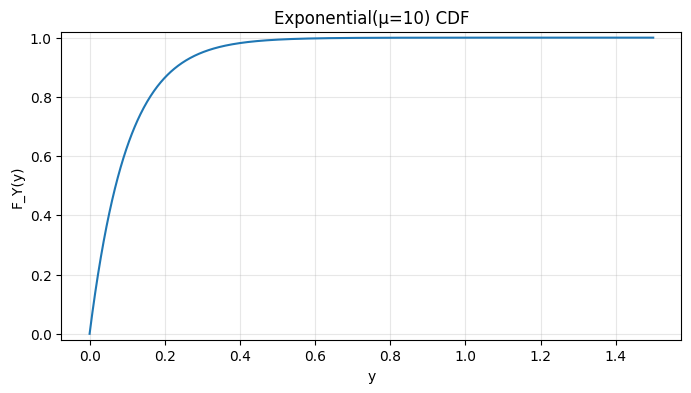

In [9]:
# Function to compute exponential pdf and cdf
def exp_pdf_cdf(mu, y_max, num=1000):
    y = np.linspace(0, y_max, num)
    pdf = mu * np.exp(-mu * y)
    cdf = 1 - np.exp(-mu * y)
    return y, pdf, cdf

# Case (i) μ = 1
mu1 = 1
y1, pdf1, cdf1 = exp_pdf_cdf(mu1, y_max=6)

plt.figure(figsize=(8,4))
plt.plot(y1, pdf1, label="PDF")
plt.title("Exponential(μ=1) PDF")
plt.xlabel("y")
plt.ylabel("f_Y(y)")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(y1, cdf1, label="CDF")
plt.title("Exponential(μ=1) CDF")
plt.xlabel("y")
plt.ylabel("F_Y(y)")
plt.ylim(-0.02, 1.02)
plt.grid(alpha=0.3)
plt.show()

# Case (ii) μ = 10
mu2 = 10
y2, pdf2, cdf2 = exp_pdf_cdf(mu2, y_max=1.5)

plt.figure(figsize=(8,4))
plt.plot(y2, pdf2, label="PDF")
plt.title("Exponential(μ=10) PDF")
plt.xlabel("y")
plt.ylabel("f_Y(y)")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(y2, cdf2, label="CDF")
plt.title("Exponential(μ=10) CDF")
plt.xlabel("y")
plt.ylabel("F_Y(y)")
plt.ylim(-0.02, 1.02)
plt.grid(alpha=0.3)
plt.show()


task c: <i>Let W be a function of two parameters λ and µ as W =
1
µ−λ
. (i) Calculate the value of W under two
settings and compare under which case the value is larger. Case 1: λ = 1 and µ = 10. Case 2: λ = 0.1
and µ = 1. (ii) Fix λ = 1. Plot W as a function of µ for 1.1 ≤ µ ≤ 10. (iii) Fix µ = 1. Plot W as a
function of λ for 0 ≤ λ ≤ 0.9</i>

Case 1 (λ=1, μ=10): W = 0.111111
Case 2 (λ=0.1, μ=1): W = 1.111111
Larger W: Case 2


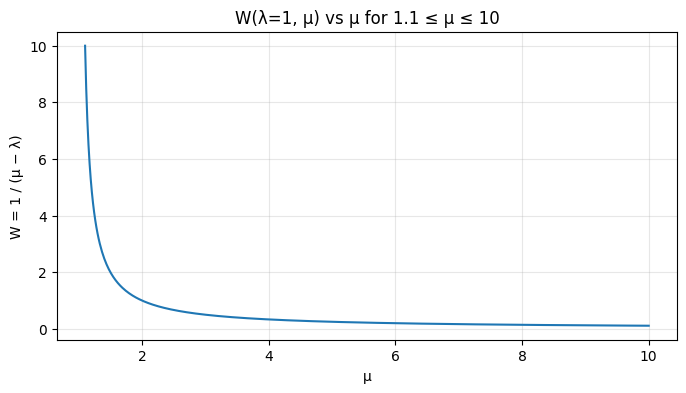

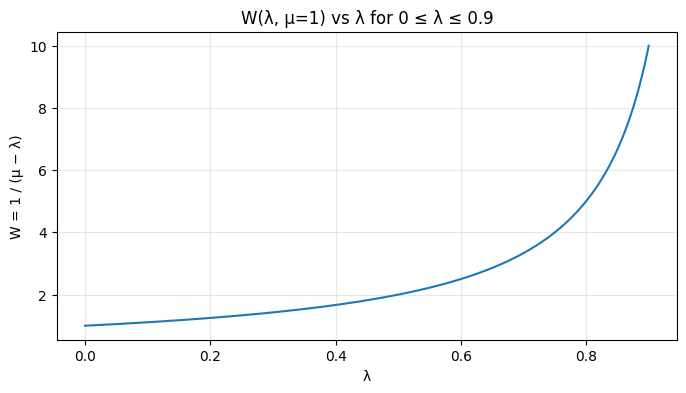

In [10]:
def W(lam, mu):
    return 1.0 / (mu - lam)

# (i) Compute and print the two cases
case1 = W(1.0, 10.0)   # λ=1, μ=10
case2 = W(0.1, 1.0)    # λ=0.1, μ=1
print(f"Case 1 (λ=1, μ=10): W = {case1:.6f}")
print(f"Case 2 (λ=0.1, μ=1): W = {case2:.6f}")
print("Larger W:", "Case 2" if case2 > case1 else "Case 1")

# (ii) Fix λ = 1. Plot W vs μ for 1.1 ≤ μ ≤ 10
lam_fixed = 1.0
mus = np.linspace(1.1, 10.0, 500)  # stay > 1 to avoid μ=λ
Ws_mu = 1.0 / (mus - lam_fixed)

plt.figure(figsize=(8,4))
plt.plot(mus, Ws_mu)
plt.title("W(λ=1, μ) vs μ for 1.1 ≤ μ ≤ 10")
plt.xlabel("μ")
plt.ylabel("W = 1 / (μ − λ)")
plt.grid(alpha=0.3)
plt.show()

# (iii) Fix μ = 1. Plot W vs λ for 0 ≤ λ ≤ 0.9
mu_fixed = 1.0
lams = np.linspace(0.0, 0.9, 500)  # stay < 1 to avoid λ=μ
Ws_lam = 1.0 / (mu_fixed - lams)

plt.figure(figsize=(8,4))
plt.plot(lams, Ws_lam)
plt.title("W(λ, μ=1) vs λ for 0 ≤ λ ≤ 0.9")
plt.xlabel("λ")
plt.ylabel("W = 1 / (μ − λ)")
plt.grid(alpha=0.3)
plt.show()


## Task 1.2 Probability Theory: Fotball Scenario

# Task 1.3 Network Dependability: Ranking nodes based on centrality measures

In [4]:
nodes = list("abcdefg")

# Define the four graphs
Gc = nx.Graph()
Gc.add_nodes_from(nodes)
Gc.add_edges_from([("a","b"),("b","c"),("c","d"),("d","e"),("e","f"),("f","g")])

Gr = Gc.copy()
Gr.add_edge("a","g")

Gd = Gc.copy()
Gd.add_edges_from([("a","c"),("e","g")])

Gt = Gd.copy()
Gt.remove_edges_from([("a","b"),("f","g")])

graphs = {"Gc": Gc, "Gr": Gr, "Gd": Gd, "Gt": Gt}

def average_degree(G):
    return 2*G.number_of_edges()/G.number_of_nodes()

# Task (a)
avg_deg = {name: average_degree(G) for name, G in graphs.items()}
print("Average node degree:")
for name, val in avg_deg.items():
    print(f"{name}: {val:.3f}")

Average node degree:
Gc: 1.714
Gr: 2.000
Gd: 2.286
Gt: 1.714


In [7]:
def centrality_table(G):
    deg_count = dict(G.degree())
    deg_cent = nx.degree_centrality(G)
    betw = nx.betweenness_centrality(G, normalized=True)
    close = nx.closeness_centrality(G)
    df = pd.DataFrame({
        "degree": pd.Series(deg_count, dtype=float),
        "degree_centrality": pd.Series(deg_cent),
        "betweenness": pd.Series(betw),
        "closeness": pd.Series(close),
    }).loc[sorted(G.nodes())]
    # Ranks (1 = highest)
    df["rank_degree"] = df["degree"].rank(ascending=False, method="min").astype(int)
    df["rank_betweenness"] = df["betweenness"].rank(ascending=False, method="min").astype(int)
    df["rank_closeness"] = df["closeness"].rank(ascending=False, method="min").astype(int)
    return df

print("\nCentrality rankings:")
for name, G in graphs.items():
    print(f"\n{name}:")
    df = centrality_table(G).round(4)
    print(df)



Centrality rankings:

Gc:
   degree  degree_centrality  betweenness  closeness  rank_degree  \
a     1.0             0.1667       0.0000     0.2857            6   
b     2.0             0.3333       0.3333     0.3750            1   
c     2.0             0.3333       0.5333     0.4615            1   
d     2.0             0.3333       0.6000     0.5000            1   
e     2.0             0.3333       0.5333     0.4615            1   
f     2.0             0.3333       0.3333     0.3750            1   
g     1.0             0.1667       0.0000     0.2857            6   

   rank_betweenness  rank_closeness  
a                 6               6  
b                 4               4  
c                 2               2  
d                 1               1  
e                 2               2  
f                 4               4  
g                 6               6  

Gr:
   degree  degree_centrality  betweenness  closeness  rank_degree  \
a     2.0             0.3333          0.2 

## (b) Centrality Rankings and Comparison

### Gc (chain of 7)
- **Degree:** middle nodes (b–f) highest; endpoints (a,g) lowest.  
- **Betweenness:** node **d** dominates; c and e next; endpoints have none.  
- **Closeness:** **d** best, then c and e; endpoints worst.  

**Finding:** In a chain, *position* matters more than degree. The middle node is the key connector.

---

### Gr (cycle of 7)
- **Degree, betweenness, closeness:** all nodes identical.  

**Finding:** A cycle is completely symmetric — all nodes are equally central.

---

### Gd (chain + shortcuts a–c, e–g)
- **Degree:** c and e stand out with degree 3.  
- **Betweenness:** **d** highest; c and e also important.  
- **Closeness:** **d** best; c and e next; leaves are farthest.  

**Finding:** Adding shortcuts redistributes importance: **d** remains the main hub, but **c** and **e** gain influence.

---

### Gt (from Gd, minus a–b and f–g)
- **Degree:** c and e = 3; d = 2; a,b,f,g = 1.  
- **Betweenness:** c, d, e tie for top; leaves have none.  
- **Closeness:** d best, then c and e; endpoints worst.  

**Finding:** Removing edges isolates endpoints and makes **c, d, e** the joint structural bottlenecks.

---

## Overall Comparison
- **Gc:** one central hub (**d**).  
- **Gr:** full symmetry — no single important node.  
- **Gd:** central hub (**d**) plus shortcuts raise **c** and **e**.  
- **Gt:** three central nodes (**c, d, e**) dominate; endpoints become leaves.  

---